In [1]:
import os
import io

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from thefuzz import fuzz
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from models import Page
from receipt_processing import *
from receipt_merge import *
from opencv_helpers import *

C:\Users\krist\AppData\Local\pypoetry\Cache\virtualenvs\doctr-api-h5-3PJCN-py3.10\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
model = ocr_predictor(pretrained=True)

C:\Users\krist\AppData\Local\pypoetry\Cache\virtualenvs\doctr-api-h5-3PJCN-py3.10\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\krist\AppData\Local\pypoetry\Cache\virtualenvs\doctr-api-h5-3PJCN-py3.10\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
# collect images in data dir by index and store parts in array
img_tests = {}
img_filenames = sorted(list(os.listdir("tests/data")))
for img_filename in img_filenames:
    name_parts = img_filename.split("_")
    idx = name_parts[0]
    label = name_parts[2]

    fullpath = os.path.join("tests/data", img_filename)
    if idx in img_tests:
        img_tests[idx]["parts"].append(fullpath)
    else:
        img_tests[idx] = {
            "label": label,
            "parts": [fullpath]
        }
print(img_tests)

{'000': {'label': 'ALDI.jpg', 'parts': ['tests/data\\000_p1_ALDI.jpg', 'tests/data\\000_p2_ALDI.jpg']}, '001': {'label': 'ALDI.jpg', 'parts': ['tests/data\\001_p1_ALDI.jpg', 'tests/data\\001_p2_ALDI.jpg']}, '002': {'label': 'GIANT.jpg', 'parts': ['tests/data\\002_p1_GIANT.jpg', 'tests/data\\002_p2_GIANT.jpg']}, '003': {'label': 'GIANT.jpg', 'parts': ['tests/data\\003_p1_GIANT.jpg', 'tests/data\\003_p2_GIANT.jpg', 'tests/data\\003_p3_GIANT.jpg']}, '004': {'label': 'GIANT.jpg', 'parts': ['tests/data\\004_p1_GIANT.jpg']}, '005': {'label': 'ALDI.jpg', 'parts': ['tests/data\\005_p1_ALDI.jpg', 'tests/data\\005_p2_ALDI.jpg']}, '006': {'label': 'HOME', 'parts': ['tests/data\\006_p1_HOME_DEPOT.jpg']}, '007': {'label': 'ALDI.jpg', 'parts': ['tests/data\\007_p1_ALDI.jpg', 'tests/data\\007_p2_ALDI.jpg']}, '008': {'label': 'RITE', 'parts': ['tests/data\\008_p1_RITE_AID.jpg']}, '009': {'label': 'ALDI.jpg', 'parts': ['tests/data\\009_p1_ALDI.jpg', 'tests/data\\009_p2_ALDI.jpg', 'tests/data\\009_p3_AL

In [4]:
img_test = img_tests['000']
label = img_test["label"]

# get doc pages as list
page_parts = []
for part_filepath in img_test["parts"]:
    doc = DocumentFile.from_images(part_filepath)
    result = model(doc)
    page_parts.append(Page.get_from_doctr_page(result.pages[0]))

In [5]:
best_merge_params = get_merge_parameters(page_parts[0], page_parts[1])

79% Horcestersnire -> Mcrcestersiire	 target_x=0.267578125	 target_y=0.6083984375	 source_x=0.296875	 source_y=0.0048828125	 0.009347098214285714/0.008998325892857142 = 1.3051948051948052
84/104 = 80% | 4793/104 = 46%
90% MacaCheese -> Mac8Cheese	 target_x=0.3125	 target_y=0.7705078125	 source_x=0.3359375	 source_y=0.130859375	 0.00927734375/0.008984375 = 1.2954545454545454
73/87 = 83% | 3933/87 = 45%
80% MacaCheese -> MaceCneese	 target_x=0.3115234375	 target_y=0.75390625	 source_x=0.3359375	 source_y=0.130859375	 0.0095703125/0.008984375 = 1.3363636363636364
68/80 = 85% | 5283/80 = 66%
100% Entree -> Entree	 target_x=0.3408203125	 target_y=0.63671875	 source_x=0.3662109375	 source_y=0.01953125	 0.009765625/0.00927734375 = 1.3636363636363638
82/93 = 88% | 5351/93 = 57%
1.0


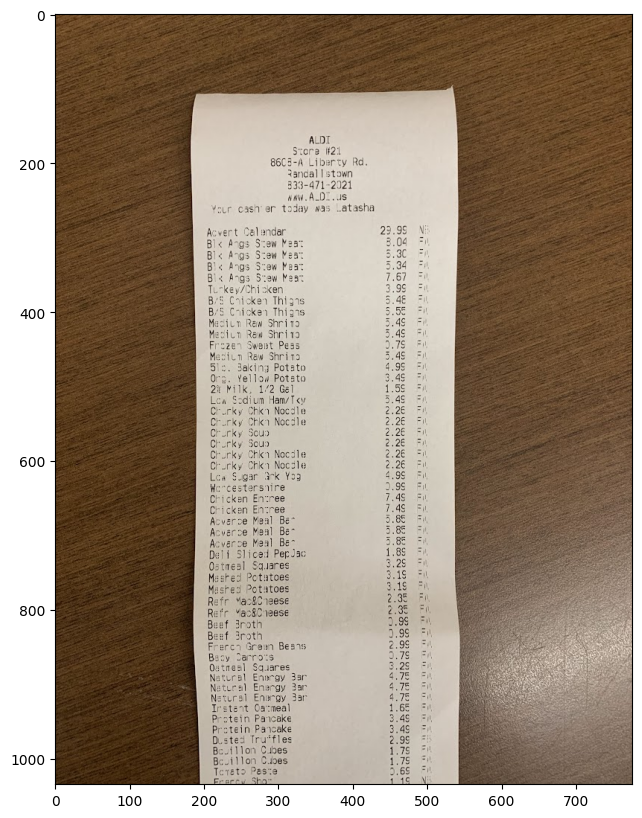

In [10]:
pg1_image = cv2.imread(img_test["parts"][0])
plot_rgb(pg1_image)

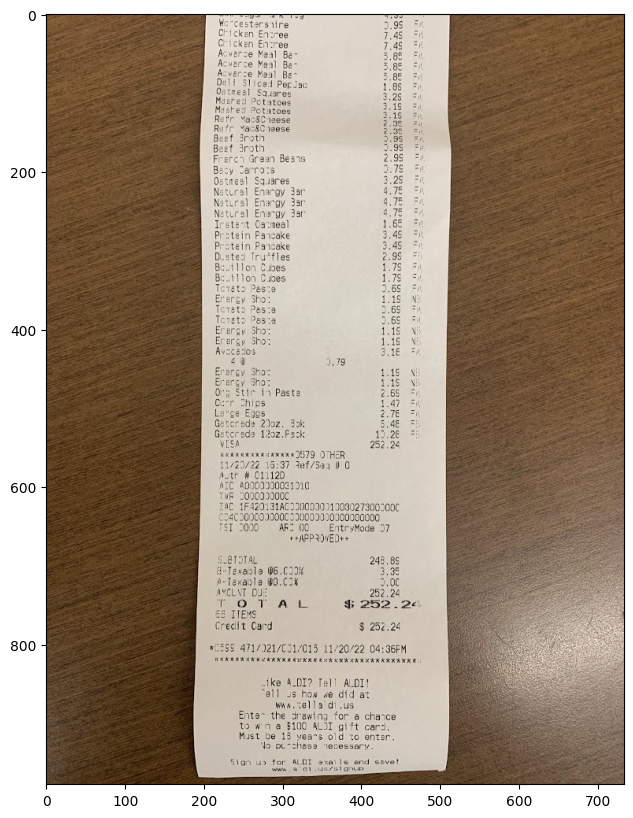

In [11]:
pg2_image = cv2.imread(img_test["parts"][1])
plot_rgb(pg2_image)

-5 653
(978, 734, 3)
(978, 734, 3)


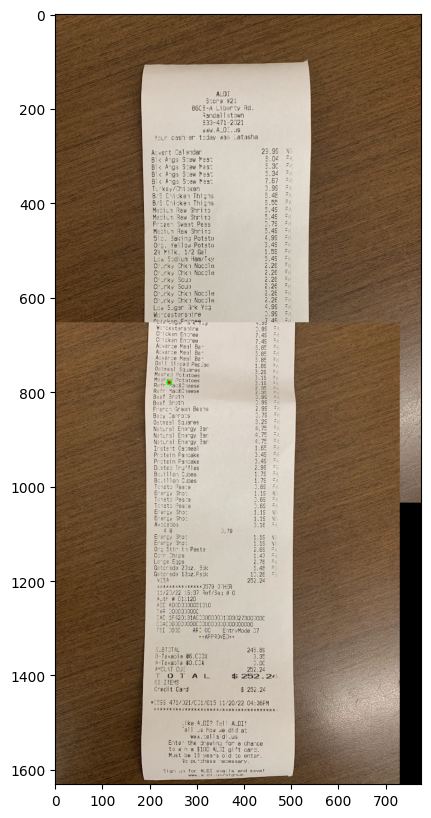

In [8]:
merged_image = merge_page_images(pg1_image, pg2_image, best_merge_params)
plot_rgb(merged_image)

In [9]:
# pg1_all_words, pg1_char_width = get_all_words_and_min_char_width(page_parts[0], False)
# pg2_all_words, pg2_char_width = get_all_words_and_min_char_width(page_parts[1], False)
# pg1_geometry = get_doc_page_geometry(page_parts[0], False)
# pg2_geometry = get_doc_page_geometry(page_parts[1], False)
#
# overlap_margin = 0.01
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg1_geometry, pg1_all_words, pg1_all_words, 1, 0, 0, 0, 0, 0.006)
# calculate_overlap_geometry_fuzzy_match(pg2_geometry, pg2_geometry, pg2_all_words, pg2_all_words, 1, 0, 0, 0, 0, 0.007)
# print()
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg1_geometry, pg1_all_words, pg1_all_words, 2, 0, 0, 0, 0, overlap_margin)
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg1_geometry, pg1_all_words, pg1_all_words, 2, 0, 0, 0.25, 0.25, overlap_margin)
# print("----")
#
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg2_geometry, pg1_all_words, pg2_all_words, 1, 0, 0, 0, 0, overlap_margin)
# print("---")
#
# scale = 1.115
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg2_geometry, pg1_all_words, pg2_all_words,
#                                        scale=scale, target_x=0.267578125, target_y=0.6083984375, source_x=0.296875, source_y=0.0048828125, overlap_margin=overlap_margin)
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg2_geometry, pg1_all_words, pg2_all_words,
#                                        scale=scale, target_x=0.3408203125, target_y=0.63671875, source_x=0.3662109375, source_y=0.01953125, overlap_margin=overlap_margin)
# calculate_overlap_geometry_fuzzy_match(pg1_geometry, pg2_geometry, pg1_all_words, pg2_all_words,
#                                        scale=scale, target_x=0.3408203125, target_y=0.6220703125, source_x=0.3662109375, source_y=0.01953125, overlap_margin=overlap_margin)
